In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz 
from sklearn.svm import SVC


In [131]:
df= pd.read_csv('Data\Cleaned_Data\TrustPilot_Cleaned_Doc_Term_With_Sentiment.csv')
df.drop(columns='UID', inplace=True)
df.head()

,able,absolutely,accept,accepted,account,actually,add,address,advance,ago,...,worse,worst,worth,would,wrong,year,yesterday,yet,zero,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.263133,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Negative
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Postitive
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Negative
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Negative
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.108582,0.0,0.0,0.0,0.0,0.0,Negative


# Train Test Split

In [5]:
Label= 'Sentiment'
X = df.drop(columns= Label)
y= df[Label]
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

print("Training Y split:")
display(y_train.value_counts().reset_index())
print("Testing Y split:")
display(y_test.value_counts().reset_index())

(6015, 500)
(6015,)
(4030, 500) (1985, 500) (4030,) (1985,)
Training Y split:


,Sentiment,count
0,Postitive,2492
1,Negative,1538


Testing Y split:


,Sentiment,count
0,Postitive,1228
1,Negative,757


In [110]:
X_test.sample(5)

,able,absolutely,accept,accepted,account,actually,add,address,advance,ago,...,working,worse,worst,worth,would,wrong,year,yesterday,yet,zero
614,0.0,0.0,0.0,0.137597,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.114397,0.0,0.16263,0.114895,0.0,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
4134,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
2927,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
1890,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0


# Multinomial NB and Testing

In [9]:
# Model fit and predict 
model= MultinomialNB()

X_train, X_test, y_train, y_test
NB1=model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print(np.round(model.predict_proba(X_test),2))

[[0.29 0.71]
 [0.05 0.95]
 [0.91 0.09]
 ...
 [0.12 0.88]
 [0.98 0.02]
 [0.95 0.05]]


              precision    recall  f1-score   support

    Negative       0.88      0.95      0.92       757
   Postitive       0.97      0.92      0.95      1228

    accuracy                           0.93      1985
   macro avg       0.93      0.94      0.93      1985
weighted avg       0.94      0.93      0.93      1985


The confusion matrix is:


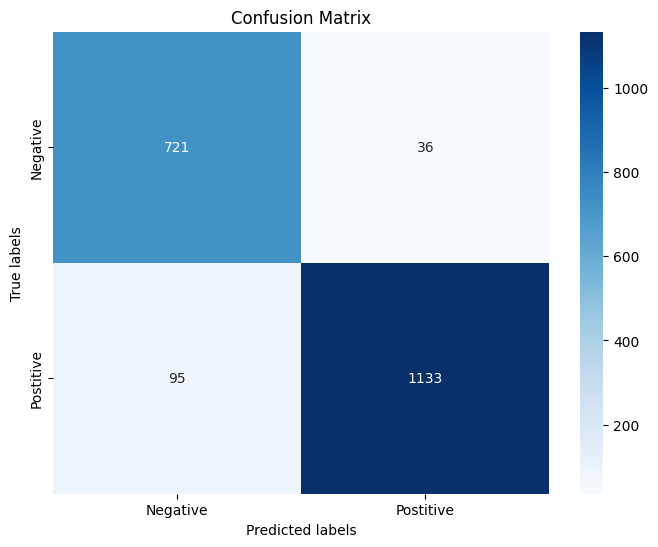

In [13]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

# Plot Confusion Matrix
import seaborn as sns 
import matplotlib.pyplot as plt 

print("\nThe confusion matrix is:")
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree and Testing

### Max_depth = 200

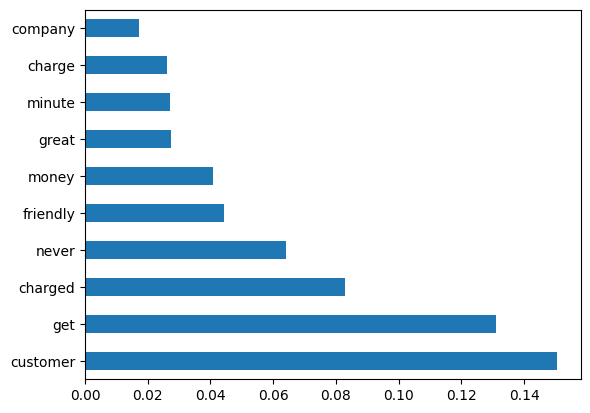

              precision    recall  f1-score   support

    Negative       0.78      0.90      0.84       757
   Postitive       0.94      0.84      0.89      1228

    accuracy                           0.87      1985
   macro avg       0.86      0.87      0.86      1985
weighted avg       0.88      0.87      0.87      1985


The confusion matrix is:


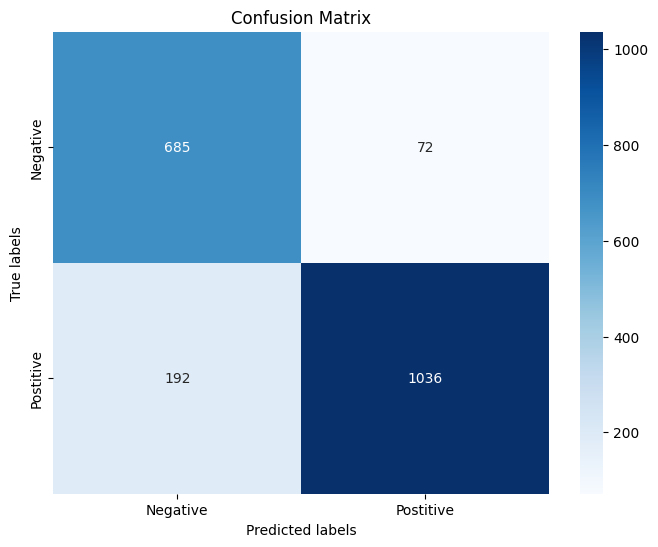

In [140]:
# Model fit
model=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=200, 
                            min_samples_split=200, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            class_weight=None)
                            
model.fit(X_train, y_train)

# Feature Importance top 5
features=pd.Series(model.feature_importances_,index=X_train.columns)
features.nlargest(10).plot(kind='barh')   #Printing top 5 features
plt.show()

# Model predict
y_pred=model.predict(X_test)

# Confusion matrix
print(classification_report(y_test,y_pred))

# Plot Confusion Matrix
print("\nThe confusion matrix is:")
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### Max_depth = 50

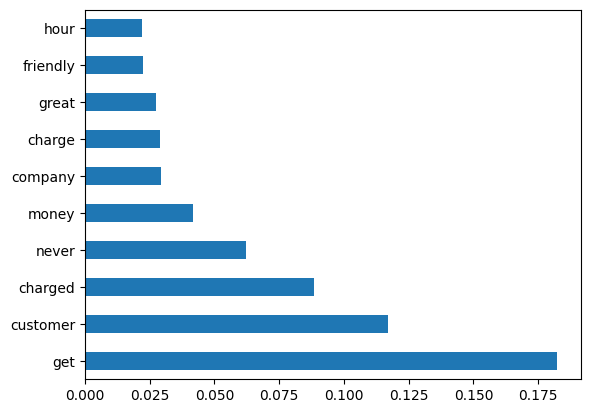

              precision    recall  f1-score   support

    Negative       0.84      0.83      0.84       757
   Postitive       0.90      0.90      0.90      1228

    accuracy                           0.88      1985
   macro avg       0.87      0.87      0.87      1985
weighted avg       0.88      0.88      0.88      1985


The confusion matrix is:


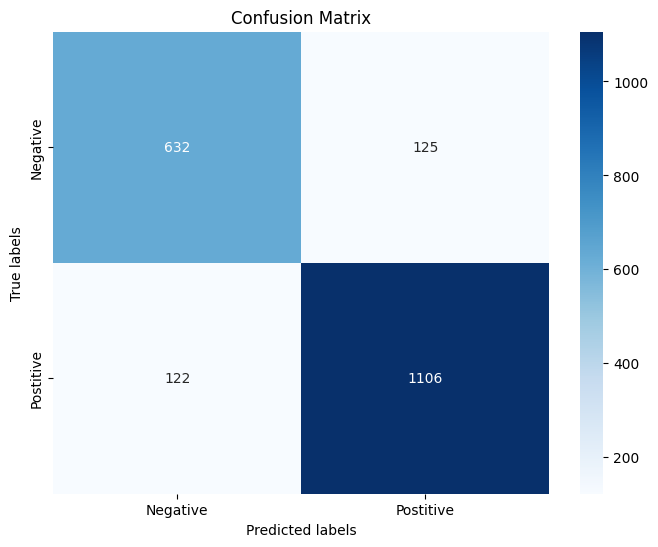

In [141]:
# Model fit
model=DecisionTreeClassifier(criterion='gini', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=50, 
                            min_samples_split=50, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            class_weight=None)
                            
model.fit(X_train, y_train)

# Feature Importance top 5
features=pd.Series(model.feature_importances_,index=X_train.columns)
features.nlargest(10).plot(kind='barh')   #Printing top 5 features
plt.show()

# Model predict
y_pred=model.predict(X_test)

# Confusion matrix
print(classification_report(y_test,y_pred))

# Plot Confusion Matrix
print("\nThe confusion matrix is:")
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### Max_depth = 100

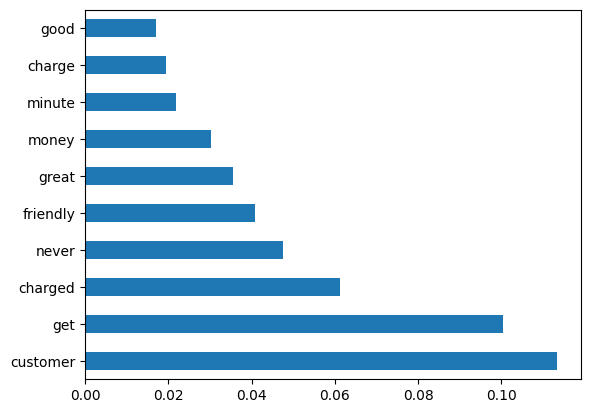

              precision    recall  f1-score   support

    Negative       0.84      0.86      0.85       757
   Postitive       0.91      0.90      0.91      1228

    accuracy                           0.89      1985
   macro avg       0.88      0.88      0.88      1985
weighted avg       0.89      0.89      0.89      1985


The confusion matrix is:


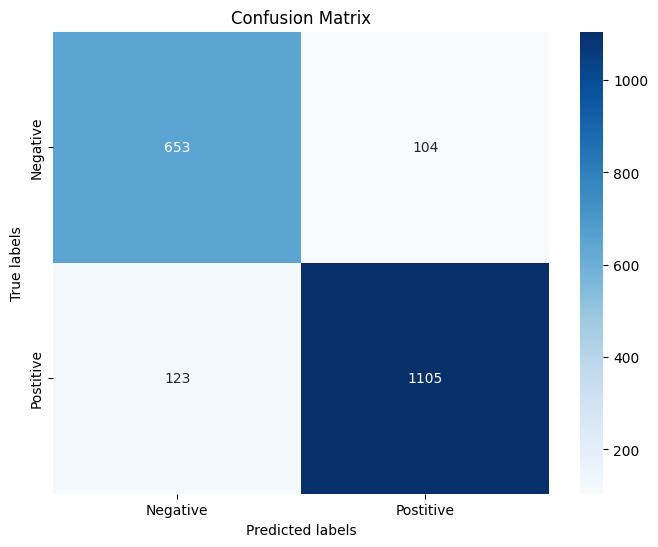

In [29]:
# Model fit
model=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=100, 
                            min_samples_split=10, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            class_weight=None)
                            
model.fit(X_train, y_train)

# Feature Importance top 5
features=pd.Series(model.feature_importances_,index=X_train.columns)
features.nlargest(10).plot(kind='barh')   #Printing top 5 features
plt.show()

# Model predict
y_pred=model.predict(X_test)

# Confusion matrix
print(classification_report(y_test,y_pred))

# Plot Confusion Matrix
print("\nThe confusion matrix is:")
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### Plotting the DT with highest accuracy (max_depth=100)

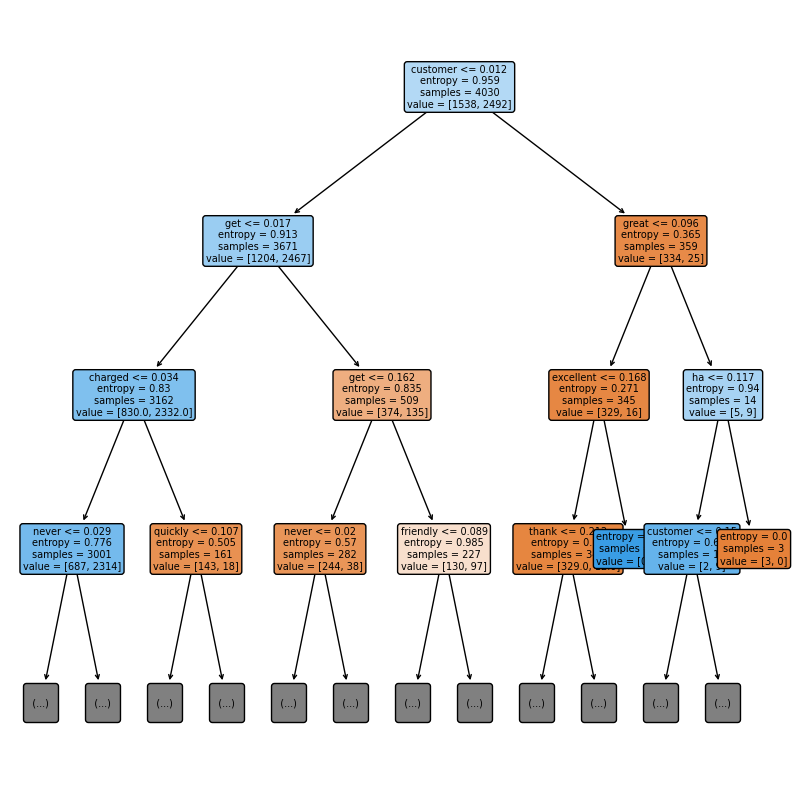

In [30]:
# Plot the decision tree
plt.figure(figsize=(10,10))  # Set the size of the figure
tree.plot_tree(model, feature_names= X_train.columns, filled=True, impurity=True, rounded=True, max_depth = 3, fontsize=7)
plt.show()

While the Decision Tree achieves a high accuracy of 88%, it prioritizes words that are not directly linked to sentiments simply because splitting the tree based on those words yields high information gain (for example, 'customer'). Consequently, although the model accurately predicts labels, there's a significant chance it may not accurately predict sentiment for complex reviews.

# SVM

### Kernel= linear | Cost parameter = 1.0

              precision    recall  f1-score   support

    Negative       0.90      0.93      0.91       757
   Postitive       0.95      0.94      0.95      1228

    accuracy                           0.93      1985
   macro avg       0.93      0.93      0.93      1985
weighted avg       0.93      0.93      0.93      1985


The confusion matrix is:


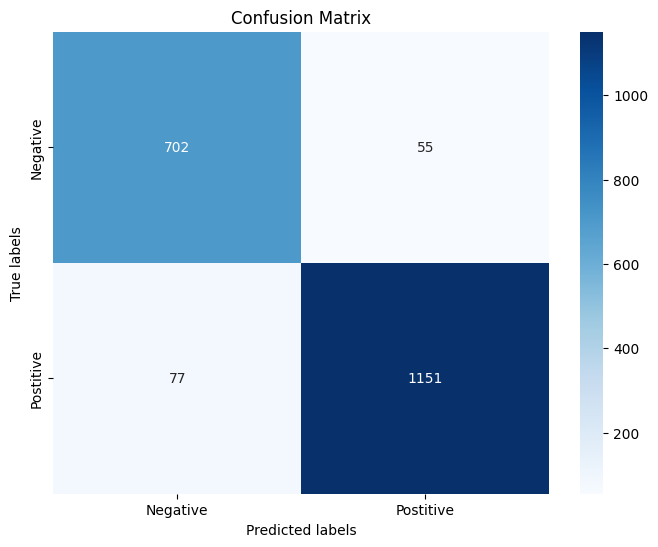

In [52]:
model=SVC(C=1.0, kernel='linear')
                            
model.fit(X_train, y_train)

# Model predict
y_pred=model.predict(X_test)

# Confusion matrix
print(classification_report(y_test,y_pred))

# Plot Confusion Matrix
print("\nThe confusion matrix is:")
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Kernel= poly | Cost parameter = 10.0

              precision    recall  f1-score   support

    Negative       0.90      0.93      0.91       757
   Postitive       0.95      0.94      0.95      1228

    accuracy                           0.93      1985
   macro avg       0.93      0.93      0.93      1985
weighted avg       0.93      0.93      0.93      1985


The confusion matrix is:


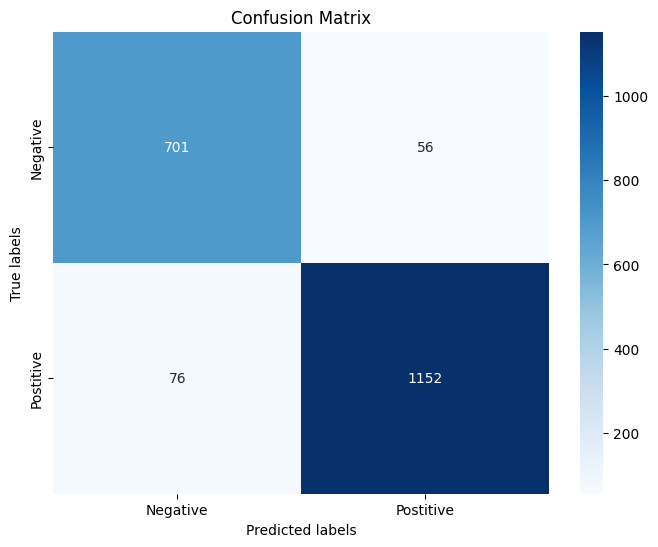

In [49]:
model=SVC(C=10.0, kernel='poly')
                            
model.fit(X_train, y_train)

# Model predict
y_pred=model.predict(X_test)

# Confusion matrix
print(classification_report(y_test,y_pred))

# Plot Confusion Matrix
print("\nThe confusion matrix is:")
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



### Kernel= rbf | Cost parameter = 5.0

              precision    recall  f1-score   support

    Negative       0.91      0.92      0.92       757
   Postitive       0.95      0.94      0.95      1228

    accuracy                           0.94      1985
   macro avg       0.93      0.93      0.93      1985
weighted avg       0.94      0.94      0.94      1985


The confusion matrix is:


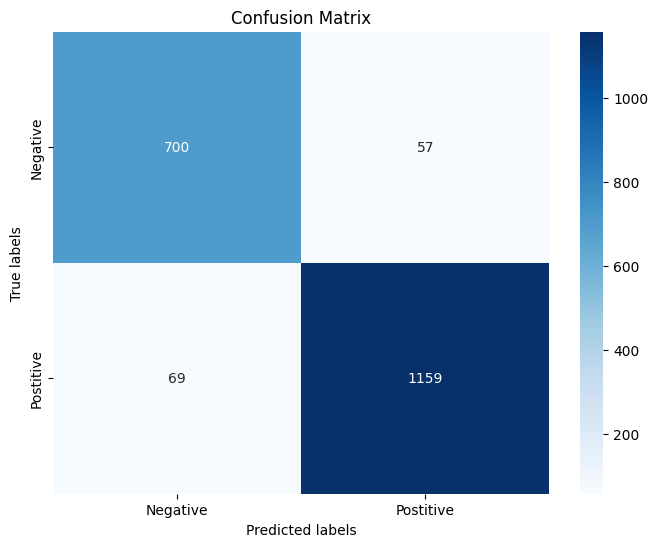

In [50]:
model=SVC(C=5.0, kernel='rbf')
                            
model.fit(X_train, y_train)

# Model predict
y_pred=model.predict(X_test)

# Confusion matrix
print(classification_report(y_test,y_pred))

# Plot Confusion Matrix
print("\nThe confusion matrix is:")
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

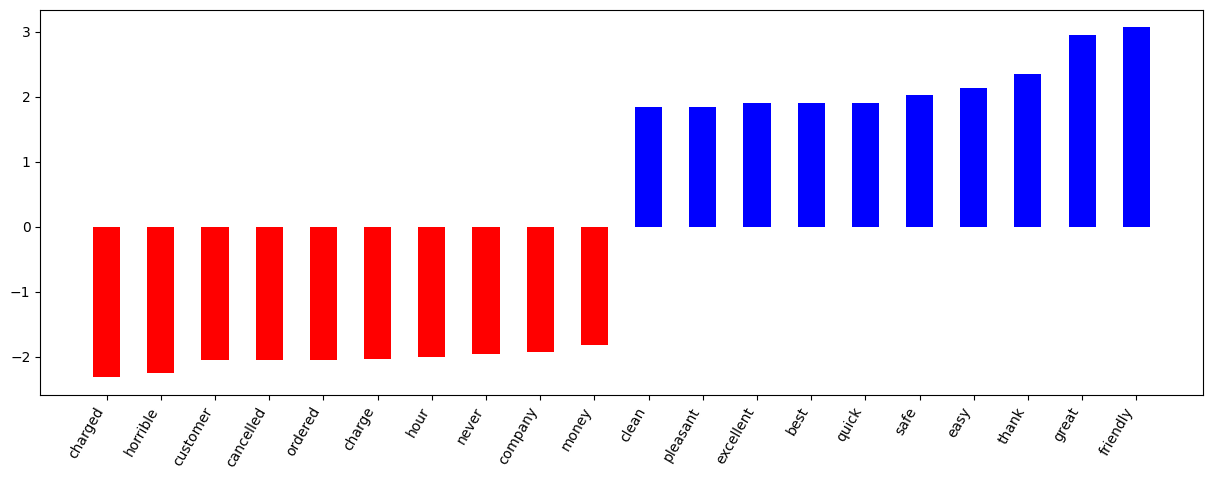

<Figure size 640x480 with 0 Axes>

In [53]:
def plot_coefficients(MODEL=model, COLNAMES=X_train.columns, top_features=10):
    ## Model if SVM MUST be SVC, RE: SVM_Model=LinearSVC(C=10)
    coef = MODEL.coef_.ravel()
    top_positive_coefficients = np.argsort(coef,axis=0)[-top_features:]
    top_negative_coefficients = np.argsort(coef,axis=0)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[top_coefficients]]
    plt.bar(  x=  np.arange(2 * top_features)  , height=coef[top_coefficients], width=.5,  color=colors)
    feature_names = np.array(COLNAMES)
    plt.xticks(np.arange(0, (2*top_features)), feature_names[top_coefficients], rotation=60, ha="right")
    plt.show()
    

plot_coefficients()
plt.savefig('KeyWords.pdf')

(-0.5, 10.5, -1509.9580928029825, 26902.915871279423)

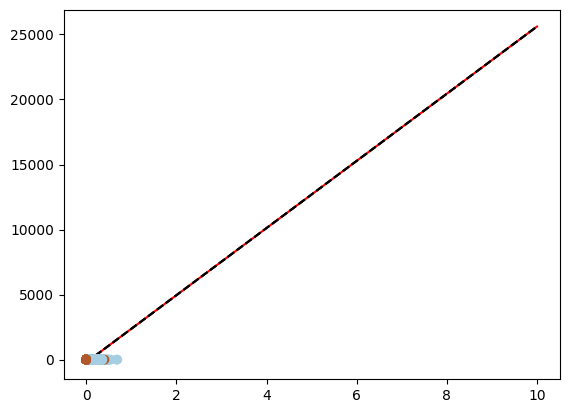

In [54]:
from sklearn.svm import SVC
X = np.array([X_train["charged"], X_train["friendly"]])
X = X.transpose()

#The classes of the training data
y = y_train
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y=lb.fit_transform(y)

y = np.array(y)
y = y.ravel()  ## to make it the right 1D array type


#Define the model with SVC
clf = SVC(C=1, kernel="linear")
clf.fit(X, y) 


margin = 2 / np.sqrt(np.sum(clf.coef_ ** 2))

# get the separating hyperplane
w = clf.coef_[0]

#The slope of the SVM sep line
a = -w[0] / w[1]

#Create a variable xx that are values between 4 and 8
xx = np.linspace(0, 10)

#Equation of sep line in 2D
yy = a * xx - (clf.intercept_[0]) / w[1]

yy_down = yy + .5*margin
yy_up = yy - .5*margin

# plot the line, the points, and the nearest vectors to the plane
plt.clf()
plt.plot(xx, yy, 'r-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=10,
                facecolors='none', zorder=5)
#cmap is the color map
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=5, cmap=plt.cm.Paired)

plt.axis('tight')

# LDA x Sentiment

In [139]:
import pickle

# Load the trained model from the file
with open('lda_model_4.pkl', 'rb') as f:
    loaded_lda_model = pickle.load(f)

lda_data= df.drop(columns=['Sentiment'])
# Transform new data using the loaded model
loaded_lda_data = loaded_lda_model.transform(lda_data)
print("Shape [NO_DOCUMENTS, NO_TOPICS]:", loaded_lda_data.shape)

Shape [NO_DOCUMENTS, NO_TOPICS]: (6015, 5)


['ride' 'minute' 'time' 'trip' 'get' 'airport' 'price' 'car' 'charged'
 'pick' 'app' 'wait' 'way' 'never' 'would' 'fee' 'take' 'day' 'got' 'home']
['clean' 'friendly' 'courteous' 'time' 'nice' 'excellent' 'professional'
 'pleasant' 'car' 'polite' 'great' 'prompt' 'safe' 'helpful' 'vehicle'
 'good' 'ride' 'destination' 'comfortable' 'arrived']
['great' 'easy' 'service' 'good' 'friendly' 'use' 'experience' 'fast'
 'time' 'always' 'quick' 'awesome' 'app' 'thank' 'convenient' 'nice'
 'ride' 'best' 'reliable' 'using']
['customer' 'service' 'company' 'get' 'money' 'never' 'card' 'account'
 'phone' 'issue' 'app' 'back' 'ride' 'order' 'charge' 'would' 'support'
 'help' 'even' 'ha']


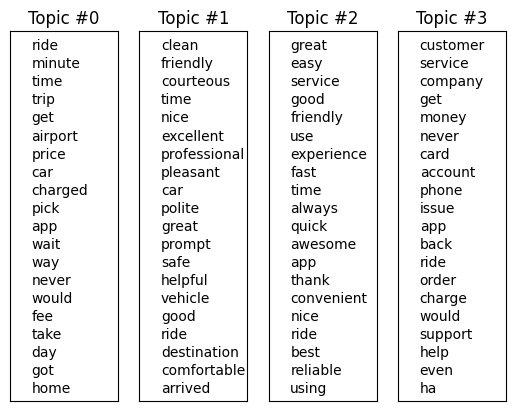

In [119]:
lda_model= loaded_lda_model

# Plot of major words in each topic
word_topic = np.array(lda_model.components_)
word_topic = word_topic.transpose()
ColumnNames = lda_data.columns

num_top_words = 20
vocab_array = np.asarray(ColumnNames)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 10
NUM_TOPICS=4

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    print(top_words)
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.2, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

#plt.tight_layout()
plt.show()

In [123]:
# Extract dominant topic for each document
dominant_topics = []
for i in range(len(loaded_lda_data)):
    dominant_topic = loaded_lda_data[i].argmax()
    dominant_topics.append(dominant_topic)

print("List of topic numbers for each row:", dominant_topics)

List of topic numbers for each row: [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 2, 3, 0, 3, 0, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 1, 3, 0, 3, 3, 3, 3, 2, 0, 1, 3, 0, 3, 3, 0, 0, 0, 2, 3, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 1, 1, 0, 0, 3, 2, 0, 1, 2, 1, 3, 0, 3, 0, 3, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 3, 3, 0, 0, 0, 3, 0, 1, 0, 3, 2, 1, 3, 2, 2, 1, 3, 3, 0, 0, 3, 3, 2, 3, 3, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 3, 3, 3, 0, 1, 2, 3, 0, 0, 3, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 2, 1, 0, 3, 0, 0, 0, 3, 2, 3, 3, 2, 3, 0, 0, 0, 2, 0, 0, 0, 1, 3, 1, 0, 0, 0, 1, 1, 2, 2, 1, 3, 2, 3, 0, 0, 1, 1, 2, 3, 3, 1, 3, 1, 3, 2, 2, 1, 2, 

In [126]:
LDA_data= df
LDA_data['LDA_Topic_Num']= dominant_topics
LDA_data.head()

,able,absolutely,accept,accepted,account,actually,add,address,advance,ago,...,worst,worth,would,wrong,year,yesterday,yet,zero,Sentiment,LDA_Topic_Num
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.263133,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Negative,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Postitive,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Negative,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Negative,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.108582,0.0,0.0,0.0,0.0,0.0,Negative,0


In [129]:
LDA_data[['LDA_Topic_Num','Sentiment']].value_counts().reset_index().sort_values(by=['LDA_Topic_Num','Sentiment'])

,LDA_Topic_Num,Sentiment,count
2,0,Negative,1079
4,0,Postitive,738
9,1,Negative,7
0,1,Postitive,1328
8,2,Negative,12
3,2,Postitive,793
1,3,Negative,1150
6,3,Postitive,257
7,4,Negative,47
5,4,Postitive,604
